In [91]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")

In [92]:
house = pd.read_csv(r'/content/drive/MyDrive/house/TRAINING_.csv',header = 0,index_col=0 )

In [93]:
test = pd.read_csv(r'/content/drive/MyDrive/house/TEST_.csv',header = 0,index_col=0 )

In [94]:
house

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
id,,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$


In [95]:
house.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [96]:
house.describe()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB
count,7000.000000,6998.000000,6997.000000,6998.000000,6999.000000,5647.000000,6998.000000,7000.000000,6999.000000,7000.000000
mean,325.225571,7.012146,4.992568,4.004716,5.501357,47.202763,89.957988,4.509429,78.975711,3.494714
std,20.550583,1.420061,1.653418,1.596984,1.509129,48.806472,11.812719,1.831187,11.852443,1.700449
min,290.000000,5.000000,2.000000,1.000000,3.000000,0.000000,70.000000,1.000000,59.000000,1.000000
25%,307.000000,6.000000,4.000000,3.000000,4.000000,0.000000,80.000000,3.000000,69.000000,2.000000
50%,326.000000,7.000000,5.000000,4.000000,5.000000,0.000000,90.000000,5.000000,79.000000,3.000000
75%,343.000000,8.000000,6.000000,5.000000,7.000000,95.000000,100.000000,6.000000,89.000000,5.000000
max,360.000000,9.000000,8.000000,7.000000,8.000000,120.000000,110.000000,8.000000,99.000000,6.000000


In [97]:
for i in house.columns:
    print({i:house[i].unique()})

{'Area(total)': array([305, 344, 294, 328, 295, 335, 322, 346, 298, 329, 304, 307, 316,
       351, 312, 318, 359, 339, 291, 313, 348, 349, 357, 336, 301, 311,
       309, 337, 334, 360, 347, 319, 356, 315, 355, 317, 302, 296, 343,
       330, 338, 290, 321, 333, 352, 350, 354, 306, 342, 324, 331, 293,
       320, 303, 300, 353, 332, 297, 326, 323, 327, 340, 292, 358, 314,
       299, 308, 325, 310, 341, 345])}
{'Troom': array([ 8.,  6.,  5.,  9.,  7., nan])}
{'Nbedrooms': array([ 2.,  7.,  4.,  5.,  6.,  3.,  8., nan])}
{'Nbwashrooms': array([ 1.,  7.,  3.,  2.,  5.,  4.,  6., nan])}
{'Twashrooms': array([ 3.,  8.,  4.,  5.,  7.,  6., nan])}
{'roof': array(['NO', 'no', 'yes', nan, 'YES'], dtype=object)}
{'Roof(Area)': array([  0.,  97.,  nan, 112.,  83.,  72.,  92.,  77.,  94., 108., 102.,
       106.,  95.,  80., 118.,  74.,  78.,  85.,  98., 109., 113.,  84.,
       101., 100., 119.,  75., 103.,  71.,  88., 120., 114.,  82.,  96.,
        91., 105., 111.,  76.,  90.,  81., 107., 115

In [98]:
house.roof.value_counts()


no     1436
NO     1419
yes    1413
YES    1379
Name: roof, dtype: int64

In [99]:
house.roof.replace({"no":"NO","yes":"YES"},inplace=True)

In [100]:
house


,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
id,,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6998,306,6.0,4.0,2.0,4.0,YES,83.0,80.0,4,96.0,4,D,3829$


In [101]:
house['roof'].fillna('N/A', inplace=True)

In [102]:
for x in house.columns:
    if house[x].dtype=="object" or house[x].dtype=="bool":
        house[x].fillna(house[x].mode()[0], inplace=True)
    elif house[x].dtype=="int64" or house[x].dtype=="float64":
        house[x].fillna(round(house[x].mean()), inplace=True)


In [103]:
house.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
id,,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
2,344,6.0,7.0,7.0,8.0,NO,0.0,83.0,7,97.0,1,B,4458$
3,294,8.0,4.0,3.0,4.0,YES,97.0,78.0,1,88.0,4,C,4199$
4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
5,295,9.0,5.0,3.0,5.0,N/A,47.0,97.0,4,93.0,3,C,4543$


In [104]:
house.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

In [105]:
house.Grade.value_counts()

C    2928
D    2129
B    1475
A     442
E      26
Name: Grade, dtype: int64

In [106]:
col=[]
for x in house.columns:
  if house[x].dtypes == "object":
    col.append(x)

In [107]:
col

['roof', 'Grade', 'EXPECTED']

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    house[x]=le.fit_transform(house[x])

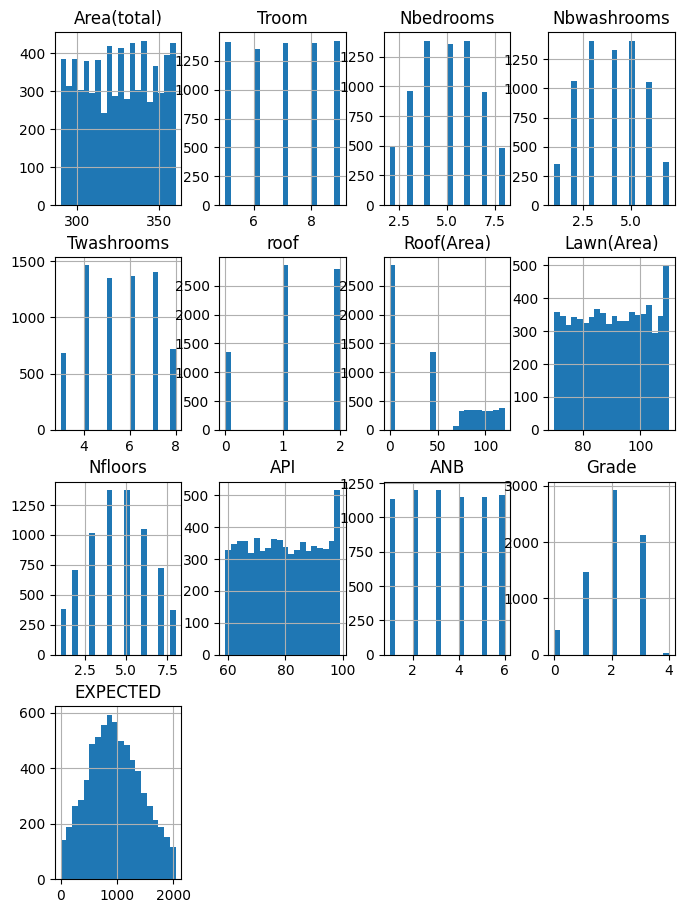

In [109]:
house.hist(bins = 20,figsize=(8,11))
plt.show()

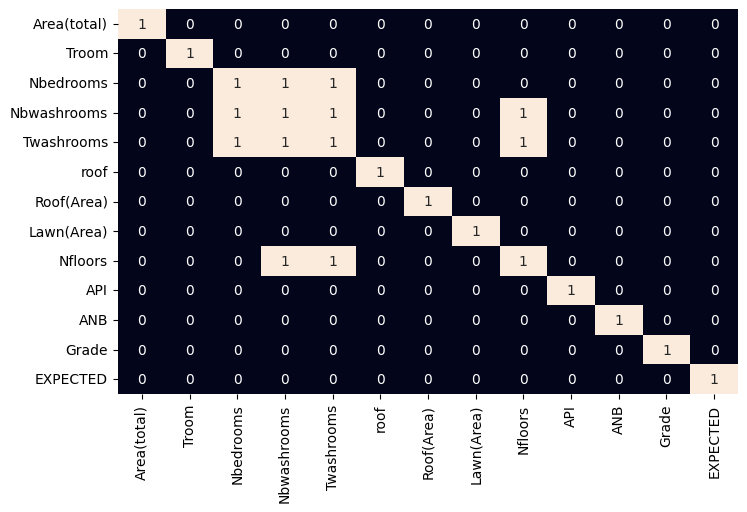

In [110]:
plt.figure(figsize=(8,5))
sns.heatmap(house.corr()>0.7,annot=True, cbar=False)
plt.show()

In [111]:
house.drop(['ANB'],axis = 1,inplace  = True)

In [112]:

cols = house.columns.tolist()
cols = cols[:-2] + [cols[-1]] + [cols[-2]]
house = house[cols]


In [113]:
X = house.values[:,:-1]
Y = house.values[:,-1]

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.20,random_state=10)

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
svc = SVC(C=3.5)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

cfm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix for SVC:")
print(cfm_svc)

classification_rep_svc = classification_report(y_test, y_pred_svc)
print("Classification Report for SVC:")
print(classification_rep_svc)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of the SVC model:", accuracy_svc)



Confusion Matrix for SVC:
[[ 83   7   0   0   0]
 [  4 297   8   0   0]
 [  0   9 537  16   0]
 [  0   0  11 423   1]
 [  0   0   0   2   2]]
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        90
         1.0       0.95      0.96      0.95       309
         2.0       0.97      0.96      0.96       562
         3.0       0.96      0.97      0.97       435
         4.0       0.67      0.50      0.57         4

    accuracy                           0.96      1400
   macro avg       0.90      0.86      0.88      1400
weighted avg       0.96      0.96      0.96      1400

Accuracy of the SVC model: 0.9585714285714285


In [117]:
svc.score(x_train,y_train)

0.9807142857142858

In [64]:
test.roof.replace({"no":"NO","yes":"YES"},inplace=True)

In [65]:
test['roof'].fillna('N/A', inplace=True)

In [66]:
for x in test.columns:
    if test[x].dtype=="object" or test[x].dtype=="bool":
        test[x].fillna(test[x].mode()[0], inplace=True)
    elif test[x].dtype=="int64" or test[x].dtype=="float64":
        test[x].fillna(round(test[x].mean()), inplace=True)


In [67]:
col=[]
for x in test.columns:
  if test[x].dtypes == "object":
    col.append(x)

In [68]:
col

['roof', 'EXPECTED']

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    test[x]=le.fit_transform(test[x])


In [70]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
id,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,0,47.0,84.0,5,91.0,6,1111
2,311,6.0,5.0,5.0,6,1,0.0,86.0,6,83.0,4,237
3,342,5.0,6.0,6.0,7,2,120.0,85.0,4,95.0,5,796
4,329,7.0,7.0,4.0,6,0,47.0,105.0,5,97.0,6,1023
5,307,6.0,2.0,3.0,4,1,0.0,76.0,2,64.0,4,27


In [71]:
test.drop(['ANB'],axis = 1,inplace  = True)

In [72]:
test=scaler.transform(test)

In [73]:
svc = SVC(C=3.5)
svc.fit(x_train, y_train)

NY_pred=svc.predict(test)

In [74]:
NY_pred

array([1., 3., 2., ..., 2., 3., 3.])

In [75]:
test

array([[ 1.10829244,  1.40013908,  0.00449414, ...,  0.26791713,
         1.01464347,  0.31165705],
       [-0.69227174, -0.7128987 ,  0.00449414, ...,  0.8140499 ,
         0.33958069, -1.5548086 ],
       [ 0.81630906, -1.41724463,  0.60947458, ..., -0.27821563,
         1.35217486, -0.36103938],
       ...,
       [-0.88692733,  0.69579316, -0.60048629, ..., -0.27821563,
         0.33958069, -0.83513019],
       [ 1.30294803, -1.41724463, -1.20546673, ..., -1.37048116,
         1.68970625, -1.39037169],
       [ 0.1836784 , -1.41724463, -1.20546673, ..., -0.8243484 ,
         1.52094055, -1.60392611]])

In [76]:
c_test=pd.read_csv(r"/content/drive/MyDrive/house/TEST_.csv")

c_test["Grade"]=NY_pred
c_test["Grade"]=c_test["Grade"].replace({ 0:'A', 1:'B', 2:'C', 3:'D', 4:'E'})
c_test

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,B
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,D
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,C
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,B
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$,C
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$,D
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$,C
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$,D


In [77]:
c_test.Grade.value_counts()

C    1412
D    1034
B     696
A     147
E      10
Name: Grade, dtype: int64

In [78]:
result = c_test.iloc[:, [0, -1]]

In [79]:
result

,id,Grade
0,1,B
1,2,D
2,3,C
3,4,B
4,5,D
...,...,...
3294,3295,C
3295,3296,D
3296,3297,C
3297,3298,D


In [ ]:
result.isnull().sum()

id       0
Grade    0
dtype: int64

In [80]:
result.to_csv('sample4.csv',index=False)